In [1]:
import torch
import matplotlib.pyplot as plt
import snntorch.spikeplot as splt
from IPython.display import HTML

from smogoutils import get_all_data_adj, compute_spiking_node_representation as csnr

In [2]:
data_folder = "BRCA"
view_list = [1, 2, 3]
num_view=3
num_class = 5

(
    data_tr_list,
    data_trte_list,
    trte_idx,
    labels_trte,
    labels_tr_tensor,
    onehot_labels_tr_tensor,
    adj_tr_list,
    adj_te_list,
    dim_list,
) = get_all_data_adj(
    data_folder,
    view_list,
    num_class,
)

/Users/gabriquaranta/repos/mla-prj-24-mla24-prj19-gu1/SMOGONET/smogoutils.py:120: UserWarning: torch.sparse.SparseTensor(indices, values, shape, *, device=) is deprecated.  Please use torch.sparse_coo_tensor(indices, values, shape, dtype=, device=). (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:623.)
  return sparse_tensortype(indices, values, x.size())


In [3]:
K = 3
num_steps = 100

enc_function = 'rate'
# enc_function = 'latency'

H_tr_v1 = csnr(data_tr_list[0], adj_tr_list[0], K, num_steps, enc_function)
H_tr_v2 = csnr(data_tr_list[1], adj_tr_list[1], K, num_steps, enc_function)
H_tr_v3 = csnr(data_tr_list[2], adj_tr_list[2], K, num_steps, enc_function)

H_trte_v1 = csnr(data_trte_list[0], adj_te_list[0], K, num_steps, enc_function)
H_trte_v2 = csnr(data_trte_list[1], adj_te_list[1], K, num_steps, enc_function)
H_trte_v3 = csnr(data_trte_list[2], adj_te_list[2], K, num_steps, enc_function)

H_te_v1=H_trte_v1
H_te_v2=H_trte_v2
H_te_v3=H_trte_v3

# labels_tr=labels_tr_tensor
# labels_trte_tensor = torch.tensor(labels_trte)
# labels_te=labels_trte_tensor[trte_idx['te']]

print(H_tr_v1.shape, H_tr_v2.shape, H_tr_v3.shape)
print(H_trte_v1.shape, H_trte_v2.shape, H_trte_v3.shape)
# print(labels_tr.shape, labels_trte_tensor.shape, labels_te.shape)

torch.Size([100, 612, 1000]) torch.Size([100, 612, 1000]) torch.Size([100, 612, 503])
torch.Size([100, 875, 1000]) torch.Size([100, 875, 1000]) torch.Size([100, 875, 503])


In [4]:
# sample first x for each view for graphs
sample_spikes = 100
H_tr_v1_sample = H_tr_v1[:sample_spikes]
H_tr_v2_sample = H_tr_v2[:sample_spikes]
H_tr_v3_sample = H_tr_v3[:sample_spikes]

# ANIMATOR

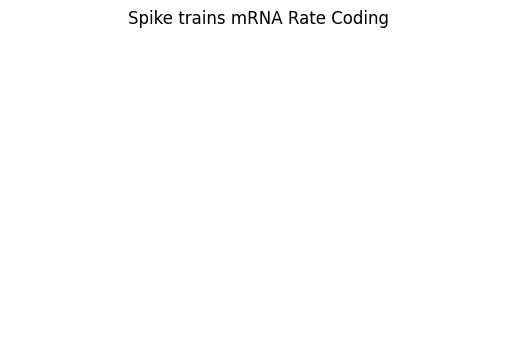

In [5]:
fig, ax = plt.subplots()
anim = splt.animator(H_tr_v1_sample, fig, ax)
plt.title("Spike trains mRNA Rate Coding")
anim.save(f"plots/spike_mRNA_rate.gif")
# HTML(anim.to_html5_video())

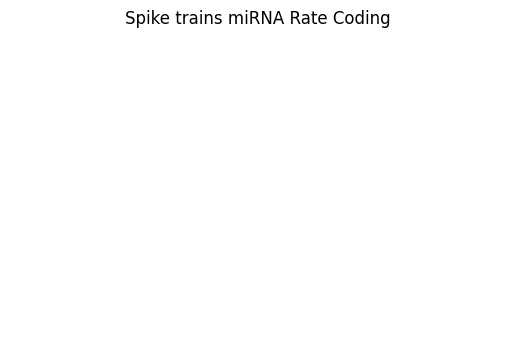

In [6]:
fig, ax = plt.subplots()
anim = splt.animator(H_tr_v2_sample, fig, ax)
plt.title("Spike trains miRNA Rate Coding")
anim.save(f"plots/spike_miRNA_rate.gif")
# HTML(anim.to_html5_video())

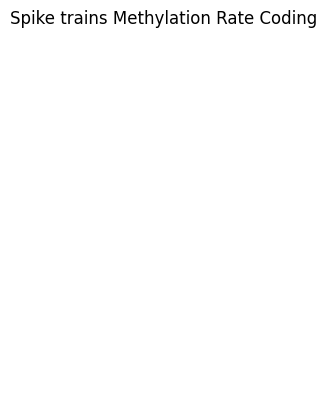

In [7]:
fig, ax = plt.subplots()
anim = splt.animator(H_tr_v3_sample, fig, ax)
plt.title("Spike trains Methylation Rate Coding")
anim.save(f"plots/spike_meth_rate.gif")
# HTML(anim.to_html5_video())